# Importing required libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as matplt

# Importing the dataset

In [5]:
df = pd.read_csv('/content/spam.tsv', sep='\t')

# Data Exploration

In [6]:
#First 5 records of spam.tsv
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
#Last 5 records of spam.tsv
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [8]:
#Checking missing values in each column of the spam.tsv file
df.isna().sum() # or df.isnull().sum()
#According to this output, there is no missing data in the file

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
#Percentage of labels spam and ham in the file
(df['label'].value_counts()*100)/len(df)

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [10]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


# Balancing the data(Making ham and spam messages equal in amount)

In [11]:
#Creating a dataframe only with messages labelled as 'ham'
ham = df[df['label'] == 'ham']

In [12]:
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [13]:
#Creating a dataframe only with messages labelled as 'spam'
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [14]:
ham.shape, spam.shape
#ham and spam dataframes have 4 columns each but unequal amount of rows

((4825, 4), (747, 4))

In [15]:
ham = ham.sample(spam.shape[0])
# Selecting random 747 rows from ham

In [16]:
ham.shape, spam.shape
#Now ham and spam dataframes have 4 columns and equal amount of rows

((747, 4), (747, 4))

In [17]:
balanced_df = ham.append(spam, ignore_index = True)
balanced_df.head()

<ipython-input-17-6f0e6b87d73b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = ham.append(spam, ignore_index = True)


,label,message,length,punct
0,ham,This weekend is fine (an excuse not to do too ...,62,2
1,ham,No de. But call me after some time. Ill tell y...,50,2
2,ham,i am going to bed now prin,26,0
3,ham,Watching telugu movie..wat abt u?,33,3
4,ham,Mm have some kanji dont eat anything heavy ok,45,0


In [18]:
balanced_df.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [19]:
balanced_df.shape

(1494, 4)

In [20]:
balanced_df['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

# Data Visualization

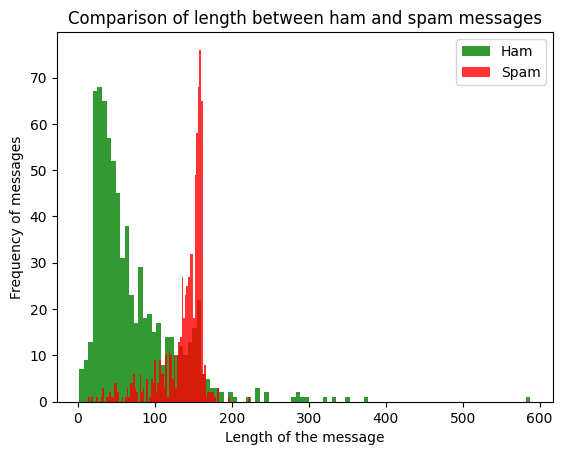

In [21]:
#bins: number of bars, alpha: transparency of the color of the bins
matplt.hist(balanced_df[balanced_df['label'] == 'ham']['length'], bins=100, alpha=0.8, color='green', label='Ham')
matplt.hist(balanced_df[balanced_df['label'] == 'spam']['length'], bins=100, alpha=0.8, color='red', label='Spam')
matplt.title('Comparison of length between ham and spam messages')
matplt.xlabel('Length of the message')
matplt.ylabel('Frequency of messages')
matplt.legend()
matplt.show()
#From this output, we can conclude that most of the ham messages are shorter in length and most spam messages have comparatively greater length

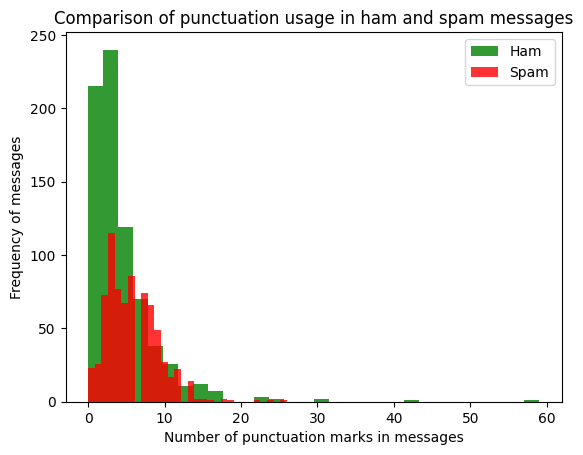

In [22]:
matplt.hist(balanced_df[balanced_df['label'] == 'ham']['punct'], bins=30, color='green', alpha=0.8, label='Ham')
matplt.hist(balanced_df[balanced_df['label'] == 'spam']['punct'], bins=30, color='red', alpha=0.8, label='Spam')
matplt.legend()
matplt.xlabel('Number of punctuation marks in messages')
matplt.ylabel('Frequency of messages')
matplt.title('Comparison of punctuation usage in ham and spam messages')
matplt.show()
# From this output, we can conclude that the punctuation usage in a message does not contribute much towards the classification of ham and spam messages

# Splitting the data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#X_Train and X_Test: Training and Testing sets for the column 'message' of balanced_df dataframe
#Y_Train and Y_Test: Training and Testing sets for the column 'label' of balanced_df dataframe
#shuffle = True: shuffles the dataset before splitting it to ensure that the training and testing sets do not exhibit biases based on the order of the data. It helps in preventing any patterns or sequences in the data from affecting the model's performance.
#random_state = 0: Using this across different runs of your code ensures that the random shuffle is the same each time.
X_Train, X_Test, Y_Train, Y_Test = train_test_split(balanced_df['message'], balanced_df['label'], test_size = 0.3, train_size = 0.7, random_state = 0, shuffle = True)

In [25]:
# Approximate number of records in X_Test and Y_Test
len(balanced_df) * (30/100)

448.2

In [26]:
# Approximate number of records in X_Train and Y_Train
len(balanced_df) * (70/100)

1045.8

In [27]:
X_Train.shape, X_Test.shape

((1045,), (449,))

In [28]:
Y_Train.shape , Y_Test.shape

((1045,), (449,))

In [29]:
X_Train

1438      You have 1 new message. Please call 08715205273
431     Hello beautiful r u ok? I've kinda ad a row wi...
194             Easy ah?sen got selected means its good..
240     I will take care of financial problem.i will h...
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559     Did either of you have any idea's? Do you know...
684            Greetings me, ! Consider yourself excused.
Name: message, Length: 1045, dtype: object

In [30]:
X_Test

799     Ur cash-balance is currently 500 pounds - to m...
1047    FreeMsg: Hey - I'm Buffy. 25 and love to satis...
1436    TheMob>Hit the link to get a premium Pink Pant...
54                          Ü come lt 25 n pass to me lar
793     Think ur smart ? Win £200 this week in our wee...
                              ...                        
824     You will recieve your tone within the next 24h...
822     URGENT!: Your Mobile No. was awarded a £2,000 ...
644                      That's y u haf 2 keep me busy...
1034    Sexy Singles are waiting for you! Text your AG...
1356    Congrats! 2 mobile 3G Videophones R yours. cal...
Name: message, Length: 449, dtype: object

In [31]:
Y_Train

1438    spam
431      ham
194      ham
240      ham
1309    spam
        ... 
763     spam
835     spam
1216    spam
559      ham
684      ham
Name: label, Length: 1045, dtype: object

In [32]:
Y_Test

799     spam
1047    spam
1436    spam
54       ham
793     spam
        ... 
824     spam
822     spam
644      ham
1034    spam
1356    spam
Name: label, Length: 449, dtype: object

# Building a model using the Random Forest Algorithm

In [33]:
#To do encoding or convert the data into numbers before training/putting the data in the model, there are various methods: Bag of Words model, TF-IDF model, Deep learning based advanced models like Word2vec or global vectors
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF: Term Frequency-Inverse Document Frequency
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [34]:
#n_estimators=100 specifies that the Random Forest should consist of 100 decision trees
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators=100))])
#Pipeline is useful when you want to encapsulate the entire process, including text feature extraction and classification, into a single object, making it easier to manage and reproduce the workflow

In [35]:
classifier.fit(X_Train, Y_Train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# Testing the model

In [36]:
Y_Pred = classifier.predict(X_Test)

In [37]:
Y_Test, Y_Pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam

In [38]:
classifier.predict(['This is an NLP Udemy Course providing Course of Completion certificate'])

array(['ham'], dtype=object)

In [39]:
classifier.predict(['Congratulations! You’ve won a $500 Amazon gift card. Claim it here: abc.com'])

array(['spam'], dtype=object)

# Evaluating the model

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [41]:
accuracy_score(Y_Test, Y_Pred)

0.955456570155902

In [47]:
#Number of test records that have been predicted correctly
accuracy_score(Y_Test, Y_Pred) * len(X_Test)

429.0

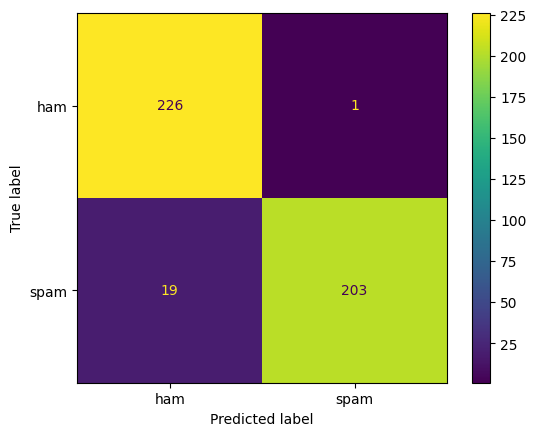

In [45]:
cm = confusion_matrix(Y_Test, Y_Pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
cmd.plot()
# TP(True Positive): Number of messages that are ham and predicted correctly as ham i.e 226 messages
# FN(False Negative): Number of messages that are ham but predicted incorrectly as spam i.e 1 message
# FP(False Positive): Number of messages that are spam but predicted incorrectly as ham i.e 19 messages
# TN(True Negative): Number of messages that are spam and predicted correctly as spam i.e 203 messages

In [44]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       227
        spam       1.00      0.91      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# Building the model using the Support Vector Machine(SVM) Algorithm

In [46]:
from sklearn.svm import SVC

In [48]:
svm = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', SVC(C=100, gamma='auto'))])

In [50]:
svm.fit(X_Train, Y_Train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# Testing the model

In [51]:
Y_Pred = svm.predict(X_Test)

In [52]:
Y_Test, Y_Pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
        'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
        'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spa

In [58]:
svm.predict(['This is an NLP Udemy Course providing Course of Completion certificate'])

array(['ham'], dtype=object)

In [59]:
svm.predict(['Congratulations! You’ve won a $500 Amazon gift card. Claim it here: abc.com'])

array(['spam'], dtype=object)

# Evaluating the model

In [53]:
accuracy_score(Y_Test, Y_Pred)

0.9465478841870824

In [54]:
#Number of test records that have been predicted correctly
accuracy_score(Y_Test, Y_Pred) * len(X_Test)

425.0

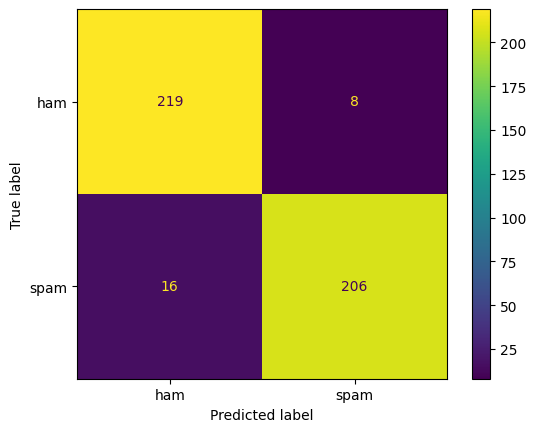

In [57]:
cm = confusion_matrix(Y_Test, Y_Pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
cmd.plot()
# TP(True Positive): Number of messages that are ham and predicted correctly as ham i.e 219 messages
# FN(False Negative): Number of messages that are ham but predicted incorrectly as spam i.e 8 messages
# FP(False Positive): Number of messages that are spam but predicted incorrectly as ham i.e 16 messages
# TN(True Negative): Number of messages that are spam and predicted correctly as spam i.e 206 messages

In [56]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

         ham       0.93      0.96      0.95       227
        spam       0.96      0.93      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449

